In [221]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from itertools import combinations
import random

In [222]:
tickers_1m = {
    "SOL_1m"  : "../Data/1m_Data/SOL_USDT_1m.csv",
    "ETH_1m"  : "../Data/1m_Data/ETH_USDT_1m.csv",
    "BTC_1m"  : "../Data/1m_Data/BTC_USDT_1m.csv",
    "AVAX_1m" : "../Data/1m_Data/AVAX_USDT_1m.csv",
    "XRP_1m" : "../Data/1m_Data/XRP_USDT_1m.csv",
    "LTC_1m"   : "../Data/1m_Data/LTC_USDT_1m.csv",
    "DOGE_1m"  : "../Data/1m_Data/DOGE_USDT_1m.csv"
}

tickers_3m = {
    "SOL_3m"  : "../Data/3m_Data/SOL_USDT_3m.csv",
    "ETH_3m"  : "../Data/3m_Data/ETH_USDT_3m.csv",
    "BTC_3m"  : "../Data/3m_Data/BTC_USDT_3m.csv",
    "AVAX_3m" : "../Data/3m_Data/AVAX_USDT_3m.csv",
    "XRP_3m"  : "../Data/3m_Data/XRP_USDT_3m.csv",
    "LTC_3m"  : "../Data/3m_Data/LTC_USDT_3m.csv",
    "DOGE_3m" : "../Data/3m_Data/DOGE_USDT_3m.csv"
}

tickers_5m = {
    "SOL_5m"  : "../Data/5m_Data/SOL_USDT_5m.csv",
    "ETH_5m"  : "../Data/5m_Data/ETH_USDT_5m.csv",
    "BTC_5m"  : "../Data/5m_Data/BTC_USDT_5m.csv",
    "AVAX_5m" : "../Data/5m_Data/AVAX_USDT_5m.csv",
    "XRP_5m"  : "../Data/5m_Data/XRP_USDT_5m.csv",
    "LTC_5m"  : "../Data/5m_Data/LTC_USDT_5m.csv",
    "DOGE_5m" : "../Data/5m_Data/DOGE_USDT_5m.csv"
}


tickers_15m = {
    "SOL_15m"  : "../Data/15m_Data/SOL_USDT_15m.csv",
    "ETH_15m"  : "../Data/15m_Data/ETH_USDT_15m.csv",
    "BTC_15m"  : "../Data/15m_Data/BTC_USDT_15m.csv",
    "AVAX_15m" : "../Data/15m_Data/AVAX_USDT_15m.csv",
    "XRP_15m"  : "../Data/15m_Data/XRP_USDT_15m.csv",
    "LTC_15m"  : "../Data/15m_Data/LTC_USDT_15m.csv",
    "DOGE_15m" : "../Data/15m_Data/DOGE_USDT_15m.csv"
}


tickers_1h = {
    "SOL_1h"  : "../Data/1h_Data/SOL_USDT_1h.csv",
    "ETH_1h"  : "../Data/1h_Data/ETH_USDT_1h.csv",
    "BTC_1h"  : "../Data/1h_Data/BTC_USDT_1h.csv",
    "AVAX_1h" : "../Data/1h_Data/AVAX_USDT_1h.csv",
    "XRP_1h"  : "../Data/1h_Data/XRP_USDT_1h.csv",
    "LTC_1h"  : "../Data/1h_Data/LTC_USDT_1h.csv",
    "DOGE_1h" : "../Data/1h_Data/DOGE_USDT_1h.csv"
}


tickers_4h = {
    "SOL_4h"  : "../Data/4h_Data/SOL_USDT_4h.csv",
    "ETH_4h"  : "../Data/4h_Data/ETH_USDT_4h.csv",
    "BTC_4h"  : "../Data/4h_Data/BTC_USDT_4h.csv",
    "AVAX_4h" : "../Data/4h_Data/AVAX_USDT_4h.csv",
    "XRP_4h"  : "../Data/4h_Data/XRP_USDT_4h.csv",
    "LTC_4h"  : "../Data/4h_Data/LTC_USDT_4h.csv",
    "DOGE_4h" : "../Data/4h_Data/DOGE_USDT_4h.csv"
}


In [223]:
base_symbol = "XRP"
quote_symbol = "DOGE"
timeframe = "1m"

ticker_map = {
    "1m": tickers_1m,
    "3m": tickers_3m,
    "5m": tickers_5m,
    "15m": tickers_15m,
    "1h" : tickers_1h,
    "4h" : tickers_4h
}

base_df = pd.read_csv(ticker_map[timeframe][f"{base_symbol}_{timeframe}"])
quote_df = pd.read_csv(ticker_map[timeframe][f"{quote_symbol}_{timeframe}"])

base_close = base_df['close']
quote_close = quote_df['close']

In [224]:

base_close_series = base_close
quote_close_series = quote_close

shared_timestamps = base_close_series.index.intersection(quote_close_series.index)

base_price_aligned = base_close_series.loc[shared_timestamps]
quote_price_aligned = quote_close_series.loc[shared_timestamps]


first_axis = base_price_aligned.to_numpy()
second_axis = quote_price_aligned.to_numpy()


/var/folders/c_/_ctxnkln1z76h710t7sk2rk40000gn/T/ipykernel_2770/2723351006.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


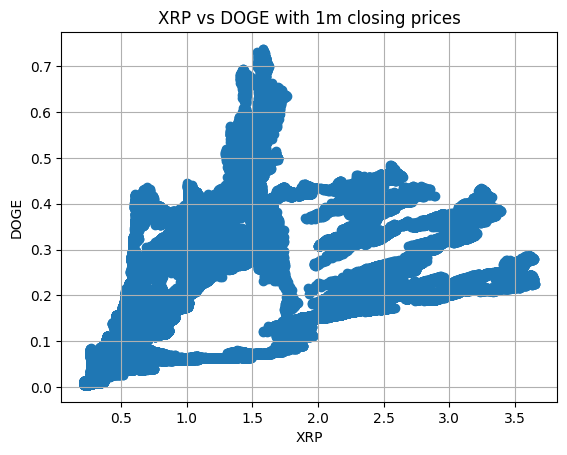

In [225]:
fig, ax = plt.subplots()
ax.scatter(first_axis,second_axis)
ax.set_xlabel(base_symbol)
ax.set_ylabel(quote_symbol)
ax.set_title(f"{base_symbol} vs {quote_symbol} with {timeframe} closing prices")
ax.grid(True)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

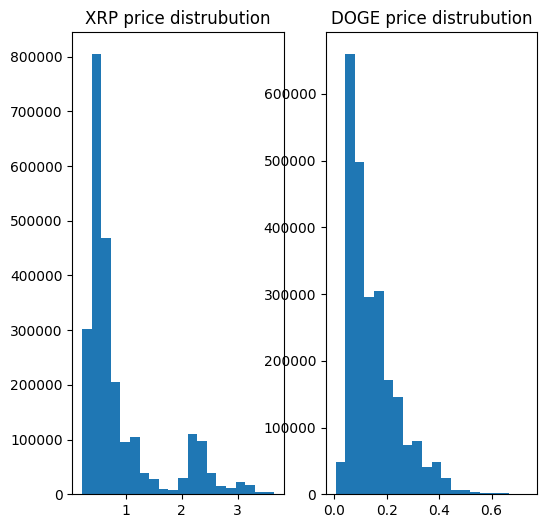

In [226]:
bins = 20

fig,(base_hist,quote_hist) = plt.subplots(nrows=1,ncols=2,figsize=(6,6))
base_hist.hist(first_axis,bins=bins)
base_hist.set_title(f"{base_symbol} price distrubution")

quote_hist.hist(second_axis,bins=bins)
quote_hist.set_title(f"{quote_symbol} price distrubution")

plt.show


In [227]:
price_matrix = np.column_stack(
    [first_axis,second_axis]
)
print(price_matrix.shape)

(2413580, 2)


In [228]:

price_centered_matrix = price_matrix - price_matrix.mean(axis=0)
print(price_centered_matrix.shape)

(2413580, 2)


In [229]:
covariance_matrix = np.cov(price_matrix,rowvar=False)
eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)

print(np.array2string(covariance_matrix, formatter={'float_kind':lambda x: "%.10f" % x}))

[[0.4958828197 0.0437968444]
 [0.0437968444 0.0094002044]]


In [230]:
U,Singular_Vals,V_Trans = np.linalg.svd(price_centered_matrix,full_matrices=False)

principal_vector_one = V_Trans[0]
principal_vector_two = V_Trans[1]

print(principal_vector_two)


[-0.08895543  0.99603561]


In [231]:
n = len(price_centered_matrix[:,0])

singular_vals_squared = [v**2 for v in Singular_Vals]

lambda_1 = singular_vals_squared[0] / (n-1)
lambda_2 = singular_vals_squared[1] / (n-1)

total_variance = lambda_1 + lambda_2
lambda_1_var = lambda_1/total_variance
lambda_2_var = lambda_2/total_variance

print(f"Total variance is {total_variance:.10f}")
print(f"lambda one explains {lambda_1_var * 100:.10f}%")
print(f"lambda two explains {lambda_2_var * 100:.10f}%")

Total variance is 0.5052830242
lambda one explains 98.9137314175%
lambda two explains 1.0862685825%


In [232]:
residual_vector = price_centered_matrix @ principal_vector_two
print(residual_vector.shape)

(2413580,)


In [233]:
base_df['timestamp'] = pd.to_datetime(base_df['timestamp'])
quote_df['timestamp'] = pd.to_datetime(quote_df['timestamp'])

base_df = base_df[['timestamp','close']].rename(columns={"close": "close_base_price"})
quote_df = quote_df[['timestamp','close']].rename(columns={"close":"close_quote_price"})

merged_df = pd.merge(base_df,quote_df,on='timestamp',how='inner')


In [234]:
x = price_centered_matrix.shape[0]
window = int(0.10 * x)
min_window = int(0.05 * x)

In [235]:
spreads = (abs(merged_df['close_base_price'].values - merged_df['close_quote_price'].values))

mean_spreads = pd.Series(spreads).rolling(window=window, min_periods=min_window).mean()
rolling_std  = pd.Series(spreads).rolling(window=window, min_periods=min_window).std().values


z_scores = (spreads - mean_spreads) / rolling_std


merged_df['spread'] = spreads
merged_df['mean_spreads'] = mean_spreads
merged_df['z_score'] = z_scores



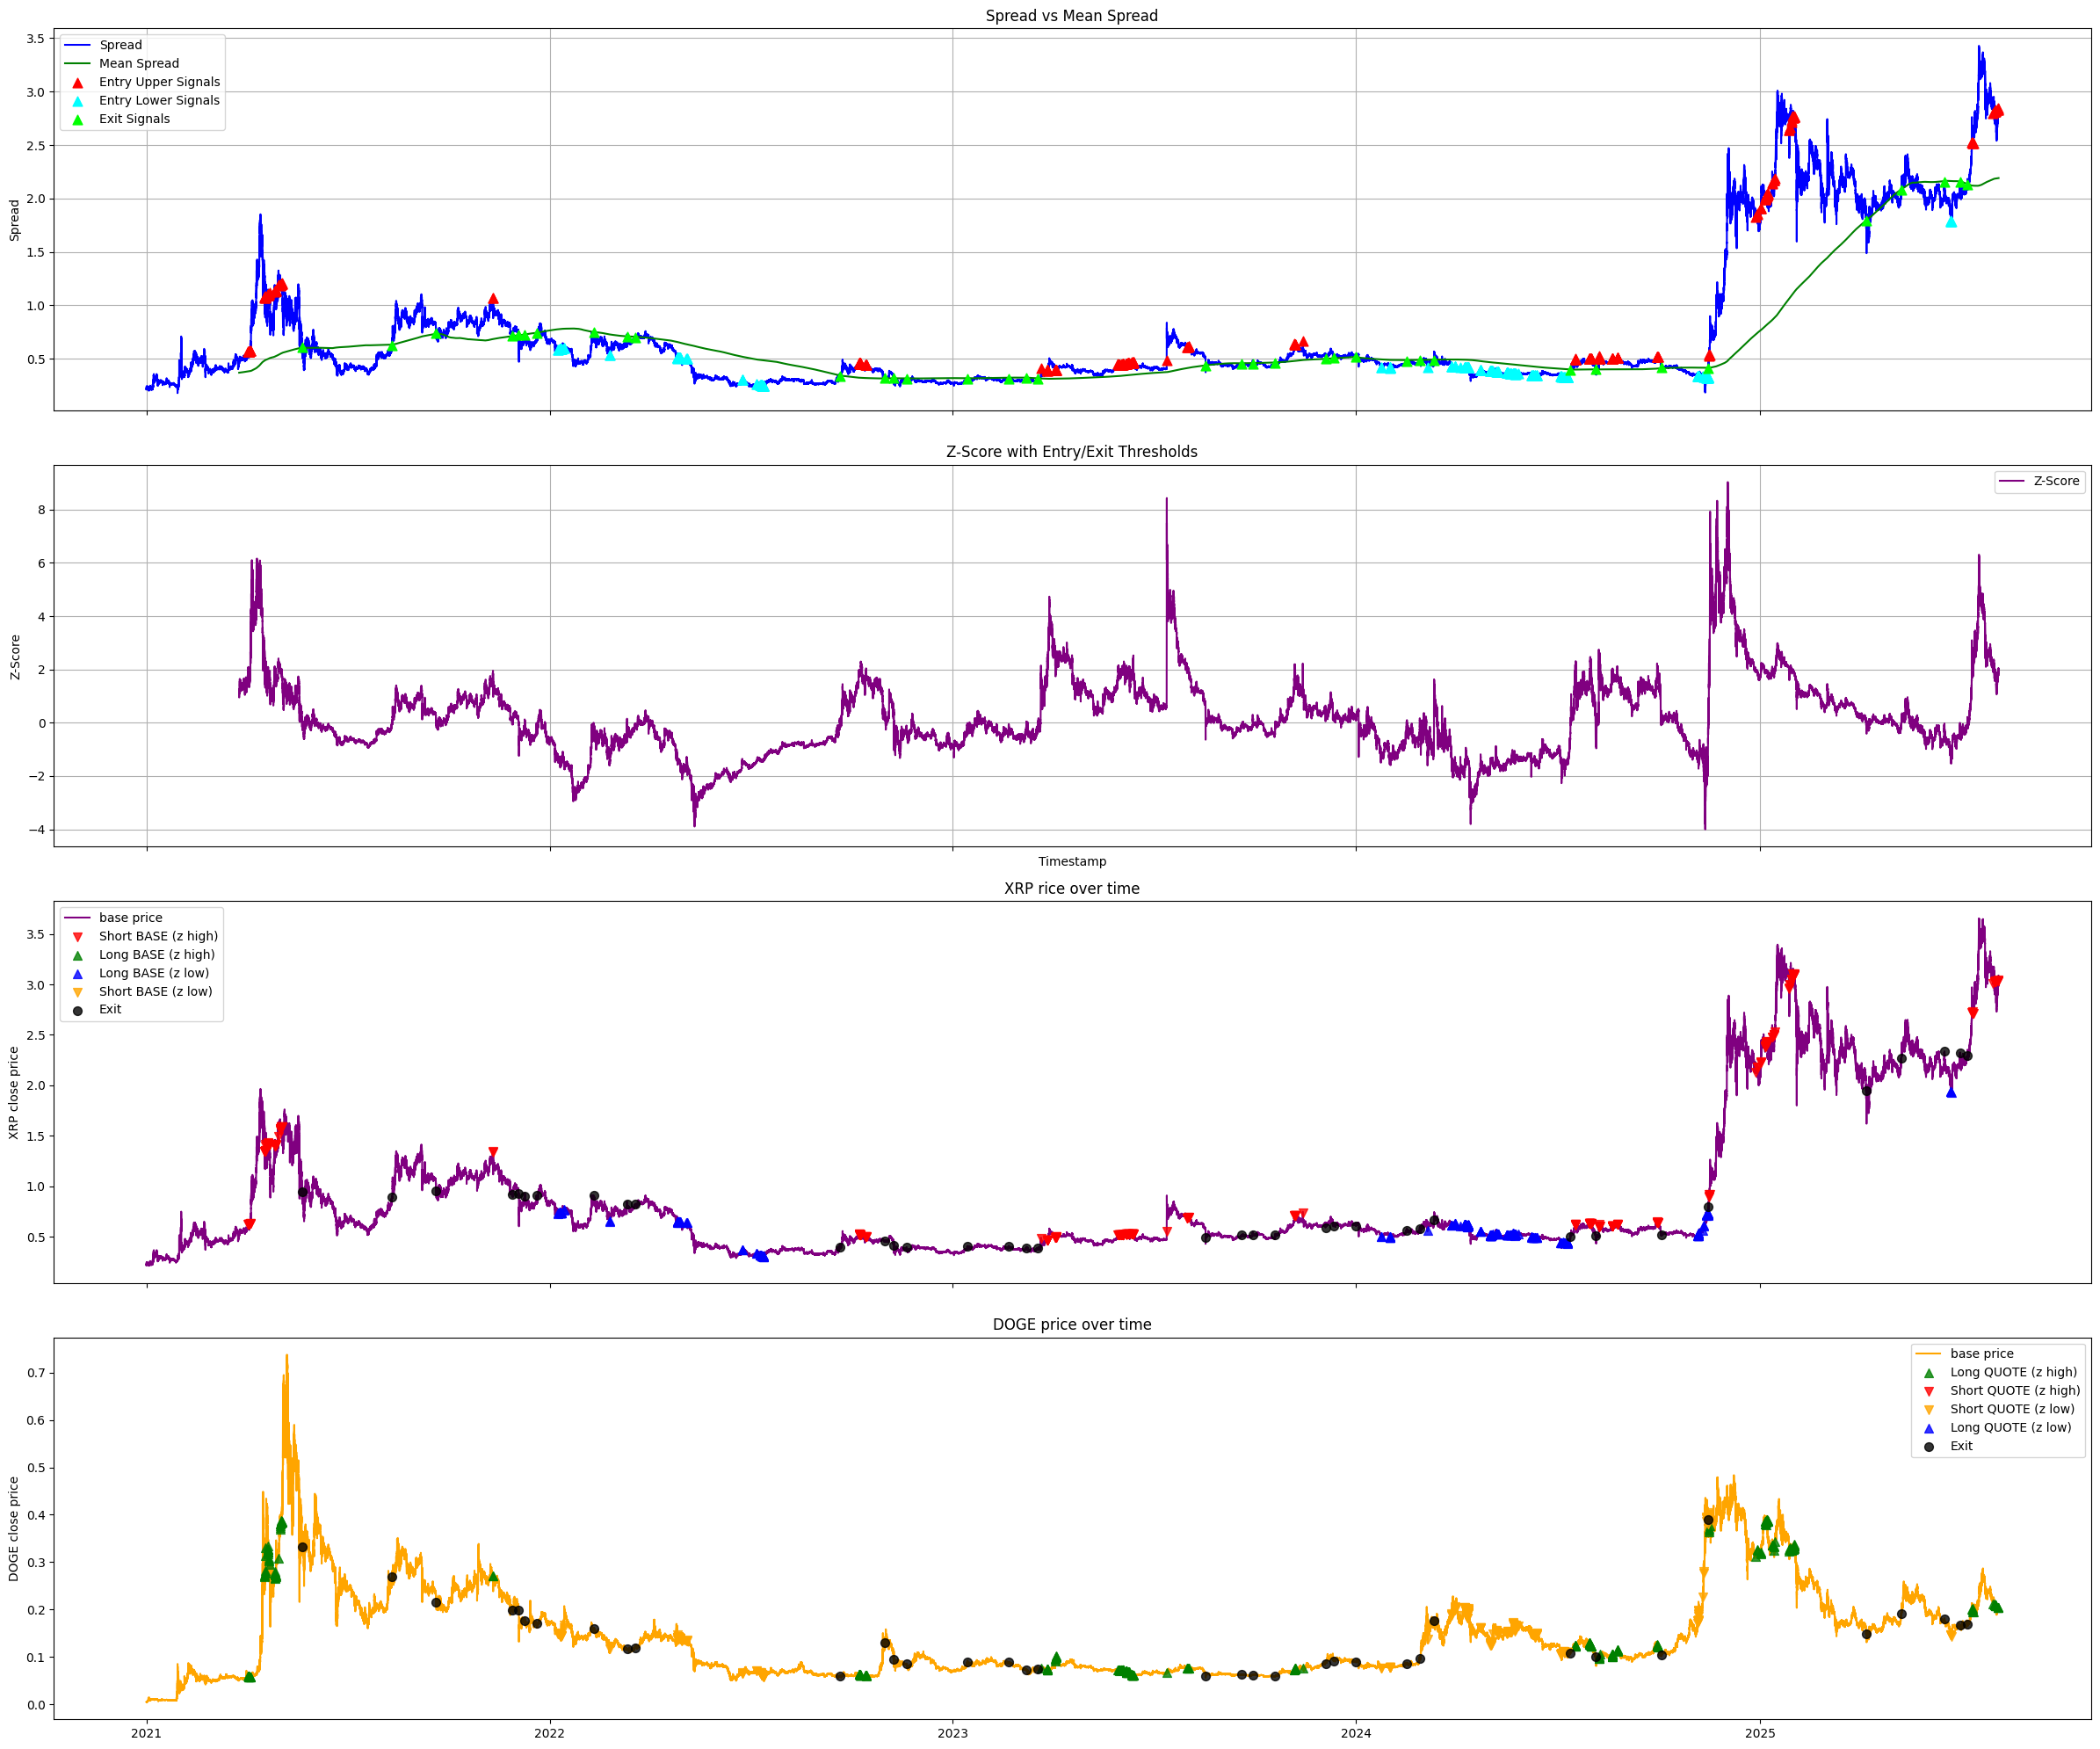

In [236]:
# ==============================
# Figure & Axes
# ==============================
fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows=4, ncols=1, figsize=(24, 20), sharex=True
)

# ==============================
# Thresholds & Signals 
# ==============================
z_scores = z_scores[~np.isnan(z_scores)]
z_scores = np.array(z_scores)

sorted_z_score = np.sort(z_scores)
perc_threshold = 0.10
threshold = int(len(sorted_z_score) * perc_threshold)

upper_tail = sorted_z_score[-threshold:]
lower_tail = sorted_z_score[:threshold]

upper_bound = upper_tail.min()
lower_bound = lower_tail.max()

epsilon = 0.01 * mean_spreads.mean()

# ==============================
# Entry Conditions (Confirm runs)
# ==============================
lookback_confirm = 3
upper_condition = merged_df['z_score'] > upper_bound
lower_condition = merged_df['z_score'] < lower_bound

entry_upper_mask = (
    upper_condition.rolling(lookback_confirm, min_periods=lookback_confirm)
    .sum()
    .eq(lookback_confirm)
)
entry_lower_mask = (
    lower_condition.rolling(lookback_confirm, min_periods=lookback_confirm)
    .sum()
    .eq(lookback_confirm)
)

# ==============================
# Candidates from masks
# ==============================
upper_candidates = merged_df.loc[entry_upper_mask]
lower_candidates = merged_df.loc[entry_lower_mask]

# ==============================
# Cooldown filter (Entries)
# ==============================
min_signal_gap = pd.Timedelta("5m")

upper_keep = (
    upper_candidates['timestamp']
    .diff()
    .gt(min_signal_gap)
    .fillna(True)
)
lower_keep = (
    lower_candidates['timestamp']
    .diff()
    .gt(min_signal_gap)
    .fillna(True)
)

entry_upper = upper_candidates.loc[upper_keep]
entry_lower = lower_candidates.loc[lower_keep]

# ==============================
# Exit Signals + Cooldown
# ==============================
exit_signal_gap = "5d"
exit_signals = merged_df[
    (merged_df['spread'] - merged_df['mean_spreads']).abs() < epsilon
]

exit_signals = exit_signals[
    exit_signals['timestamp'].diff().fillna(pd.Timedelta("999D")) > exit_signal_gap
]

# ==============================
# Top Plot: Spread + Mean Spread
# ==============================
ax1.plot(merged_df['timestamp'], merged_df['spread'],        label='Spread',      color='blue')
ax1.plot(merged_df['timestamp'], merged_df['mean_spreads'],  label='Mean Spread', color='green')
ax1.set_ylabel("Spread")
ax1.set_title("Spread vs Mean Spread")
ax1.legend()
ax1.grid(True)

# ---------------------------------
# Plot Entry/Exit markers on Spread
# ---------------------------------
ax1.scatter(entry_upper['timestamp'], entry_upper['spread'],
            color='red', marker="^", label='Entry Upper Signals', s=60, zorder=10)
ax1.scatter(entry_lower['timestamp'], entry_lower['spread'],
            color='cyan', marker="^", label='Entry Lower Signals', s=60, zorder=10)
ax1.scatter(exit_signals['timestamp'], exit_signals['spread'],
            color='lime', marker="^", label='Exit Signals', s=60, zorder=10)
ax1.legend()

# ==========================================
# Z-Score Plot: Z + (Entry/Exit) Thresholds
# ==========================================
ax2.plot(merged_df['timestamp'], merged_df['z_score'], label='Z-Score', color='purple')
ax2.set_ylabel("Z-Score")
ax2.set_title("Z-Score with Entry/Exit Thresholds")
ax2.legend()
ax2.grid(True)

# X-axis formatting (shared)
ax2.set_xlabel("Timestamp")
plt.setp(ax2.get_xticklabels(), rotation=45)


# ==================================
# Price Plot: Base (third subplot)
# ==================================
ax3.plot(merged_df['timestamp'], merged_df['close_base_price'],
         label='base price', color='purple')
ax3.set_title(f"{base_symbol} rice over time")
ax3.set_ylabel(f"{base_symbol} close price")

# --- Entry Upper (z >>) logic ---
# BASE > QUOTE  -> short BASE, long QUOTE
mask_short_base_long_quote_upper = entry_upper['close_base_price'] > entry_upper['close_quote_price']
# BASE < QUOTE  -> short QUOTE, long BASE
mask_short_quote_long_base_upper = entry_upper['close_base_price'] < entry_upper['close_quote_price']

ax3.scatter(entry_upper['timestamp'][mask_short_base_long_quote_upper],
            entry_upper['close_base_price'][mask_short_base_long_quote_upper],
            marker='v', s=50, alpha=0.8, color='red',   label='Short BASE (z high)', zorder=10)
ax3.scatter(entry_upper['timestamp'][mask_short_quote_long_base_upper],
            entry_upper['close_base_price'][mask_short_quote_long_base_upper],
            marker='^', s=50, alpha=0.8, color='green', label='Long BASE (z high)',  zorder=10)

# --- Entry Lower (z <<) logic ---
# BASE > QUOTE  -> long BASE, short QUOTE
mask_long_base_short_quote_lower = entry_lower['close_base_price'] > entry_lower['close_quote_price']
# BASE < QUOTE  -> long QUOTE, short BASE
mask_long_quote_short_base_lower = entry_lower['close_base_price'] < entry_lower['close_quote_price']

ax3.scatter(entry_lower['timestamp'][mask_long_base_short_quote_lower],
            entry_lower['close_base_price'][mask_long_base_short_quote_lower],
            marker='^', s=50, alpha=0.8, color='blue',  label='Long BASE (z low)',  zorder=10)
ax3.scatter(entry_lower['timestamp'][mask_long_quote_short_base_lower],
            entry_lower['close_base_price'][mask_long_quote_short_base_lower],
            marker='v', s=50, alpha=0.8, color='orange',label='Short BASE (z low)', zorder=10)

# --- Exit markers on BASE ---
ax3.scatter(exit_signals['timestamp'], exit_signals['close_base_price'],
            marker='o', s=50, alpha=0.8, color='black', label='Exit', zorder=12)

ax3.legend(loc='best')

# ===================================
# Price Plot: Quote (fourth subplot)
# ===================================
ax4.plot(merged_df['timestamp'], merged_df['close_quote_price'],
         label='base price', color='orange')
ax4.set_title(f"{quote_symbol} price over time")
ax4.set_ylabel(f"{quote_symbol} close price")

# --- Entry Upper (z >>) markers on QUOTE ---
ax4.scatter(entry_upper['timestamp'][mask_short_base_long_quote_upper],
            entry_upper['close_quote_price'][mask_short_base_long_quote_upper],
            marker='^', s=50, alpha=0.8, color='green', label='Long QUOTE (z high)',  zorder=10)
ax4.scatter(entry_upper['timestamp'][mask_short_quote_long_base_upper],
            entry_upper['close_quote_price'][mask_short_quote_long_base_upper],
            marker='v', s=50, alpha=0.8, color='red',   label='Short QUOTE (z high)', zorder=10)

# --- Entry Lower (z <<) markers on QUOTE ---
ax4.scatter(entry_lower['timestamp'][mask_long_base_short_quote_lower],
            entry_lower['close_quote_price'][mask_long_base_short_quote_lower],
            marker='v', s=50, alpha=0.8, color='orange',label='Short QUOTE (z low)', zorder=10)
ax4.scatter(entry_lower['timestamp'][mask_long_quote_short_base_lower],
            entry_lower['close_quote_price'][mask_long_quote_short_base_lower],
            marker='^', s=50, alpha=0.8, color='blue',  label='Long QUOTE (z low)',  zorder=10)

# --- Exit markers on QUOTE ---
ax4.scatter(exit_signals['timestamp'], exit_signals['close_quote_price'],
            marker='o', s=50, alpha=0.8, color='black', label='Exit', zorder=12)

ax4.legend(loc='best')


plt.tight_layout()
plt.show()


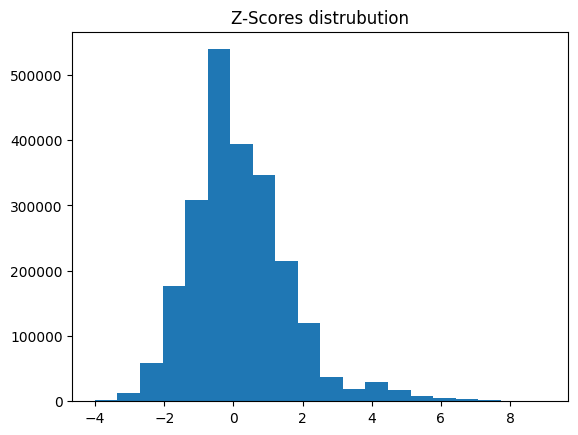

In [237]:
bins = 20

fig,(base_hist) = plt.subplots()
base_hist.hist(z_scores,bins=bins)
base_hist.set_title(f"Z-Scores distrubution")

plt.show()